<a href="https://colab.research.google.com/github/cheetosdump/CCINSYSL_ASSIGNMENT_COM-DF211/blob/main/exercise_5_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5 B

In [ ]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [ ]:
faces = fetch_olivetti_faces()

In [ ]:
faces.data.shape

(400, 4096)

In [ ]:
faces.images.shape

(400, 64, 64)

In [ ]:
faces.target.shape

(400,)

In [ ]:
faces.target[200]

20

#### 1. Plot the image of index zero

<Figure size 640x480 with 0 Axes>

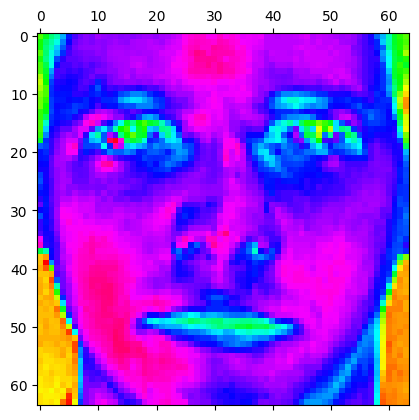

In [ ]:
plt.hsv()
plt.matshow(faces.images[0])
plt.show()

#### 2. Create a subplot of 10 images in a 3x3 configuration

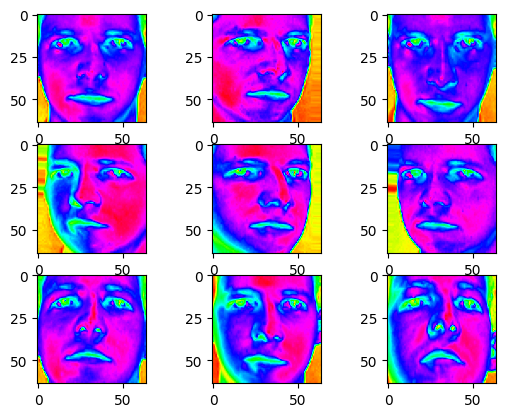

In [ ]:
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(faces.images[0])
axarr[0,1].imshow(faces.images[1])
axarr[0,2].imshow(faces.images[2])
axarr[1,0].imshow(faces.images[3])
axarr[1,1].imshow(faces.images[4])
axarr[1,2].imshow(faces.images[5])
axarr[2,0].imshow(faces.images[6])
axarr[2,1].imshow(faces.images[7])
axarr[2,2].imshow(faces.images[8])
plt.show()

#### 3. Split the data into a training and test set

In [ ]:
train_img, test_img, train_lbl, test_lbl = train_test_split(
    faces.data, faces.target, test_size=1/7.0, random_state=0)

#### 4. Create a new instance of the LogisticRegression class

In [ ]:
logisticReg = LogisticRegression()

#### 5. Train the model using the training set using the `fit()` function

In [ ]:
logisticReg.fit(train_img, train_lbl)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 6. Use the test data to test the model using the `predict()` function

In [ ]:
predictions = logisticReg.predict(test_img)

#### 7. Get the accuracy using the `score()` function

In [ ]:
score = logisticReg.score(test_img, test_lbl)
print(score)

0.9655172413793104


#### 8. Collect all the misclassified images and create a plot for visualization

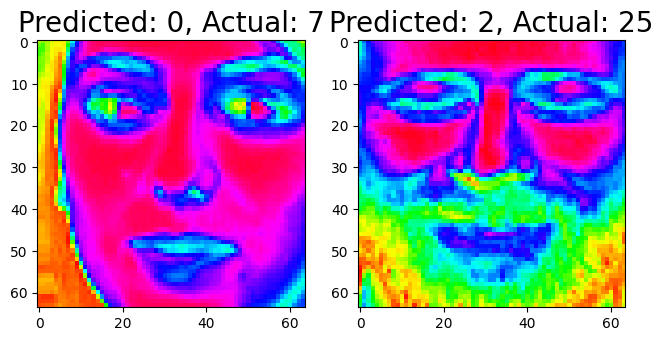

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (64, 64, 1)), cmap=plt.cm.hsv)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 20)

## Gradient Descent

#### 9. Use the `SGDClassifier()` to use gradient descent to minimize the loss

In [ ]:
gradmin = SGDClassifier(loss="log_loss", penalty="l2")

#### 10. Train the model using the training set using the `fit()` function

In [ ]:
gradmin.fit(train_img, train_lbl)

SGDClassifier(loss='log_loss')

#### 11. Use the test data to test the model using the `predict()` function

In [ ]:
y_pred = gradmin.predict(test_img)

#### 12. Get the accuracy using the `score()` function

In [ ]:
score = gradmin.score(test_img, test_lbl)
print(score)

0.8103448275862069


#### 13. Find the best number of iterations to get the best accuracy

0.8103448275862069
0.9137931034482759
0.8620689655172413


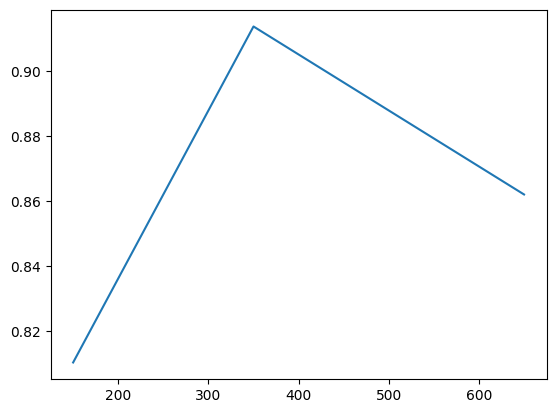

In [ ]:
numberIteration = [150, 350, 650]
scores = []
for i in numberIteration:
  gradmin = SGDClassifier(loss="log_loss", penalty="l2")
  gradmin.fit(train_img, train_lbl)
  y_pred = gradmin.predict(test_img)
  score = gradmin.score(test_img, test_lbl)
  scores.append(score)
  print(score)

plt.plot(numberIteration, scores)